# STOCK MARKET PREDICTION USING LSTM

In [1]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time 

api_key = 'RNZPXZ6Q9FEFMEHM'

ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT', interval = '1min', outputsize = 'full')
print(data)
close_data = data['4. close']

print(close_data)

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2022-06-09 19:56:00   265.33   265.33  265.33    265.33      432.0
2022-06-09 19:53:00   265.30   265.46  265.30    265.46     2082.0
2022-06-09 19:50:00   265.30   265.30  265.30    265.30      136.0
2022-06-09 19:49:00   265.30   265.30  265.30    265.30      254.0
2022-06-09 19:47:00   265.28   265.30  265.28    265.30      358.0
...                      ...      ...     ...       ...        ...
2022-05-27 04:47:00   267.38   267.38  267.20    267.20      770.0
2022-05-27 04:45:00   267.22   267.22  267.22    267.22      708.0
2022-05-27 04:42:00   267.24   267.24  267.24    267.24      218.0
2022-05-27 04:33:00   267.30   267.30  267.30    267.30      182.0
2022-05-27 04:17:00   266.08   266.08  266.08    266.08      505.0

[5396 rows x 5 columns]
date
2022-06-09 19:56:00    265.33
2022-06-09 19:53:00    265.46
2022-06-09 19:50:00    265.30
2022-06-0

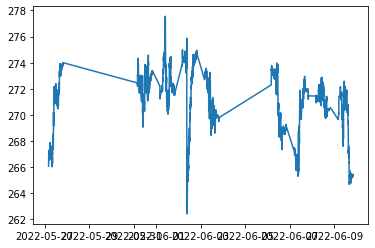

In [2]:
import matplotlib.pyplot as plt
plt.plot(close_data)

In [3]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close_data=scaler.fit_transform(np.array(close_data).reshape(-1,1))

print(close_data)

[[0.19220608]
 [0.2007926 ]
 [0.19022457]
 ...
 [0.31836196]
 [0.32232497]
 [0.24174373]]


In [4]:
training_size=int(len(close_data)*0.65)
test_size=len(close_data)-training_size
train_data,test_data=close_data[0:training_size,:],close_data[training_size:len(close_data),:1]

print(training_size,test_size)
print(train_data, test_data)

3507 1889
[[0.19220608]
 [0.2007926 ]
 [0.19022457]
 ...
 [0.7655218 ]
 [0.77080581]
 [0.77014531]] [[0.76486129]
 [0.77212682]
 [0.7998679 ]
 ...
 [0.31836196]
 [0.32232497]
 [0.24174373]]


In [5]:
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(3406, 100)
(3406,)
(1788, 100)
(1788,)


(None, None)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
54/54 [==============================] - 15s 192ms/step - loss: 0.0224 - val_loss: 0.0043
Epoch 2/100
54/54 [==============================] - 9s 172ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 3/100
54/54 [==============================] - 10s 180ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 4/100
54/54 [==============================] - 10s 181ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 5/100
54/54 [==============================] - 10s 180ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 6/100
54/54 [==============================] - 10s 188ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 7/100
54/54 [==============================] - 10s 179ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 8/100
54/54 [==============================] - 9s 172ms/step - loss: 0.0014 - val_loss: 9.9824e-04
Epoch 9/100
54/54 [==============================] - 8s 155ms/step - loss: 0.0013 - val_loss: 9.6578e-04
Epoch 10/100
54/54 [==============================] - 9s 158ms/step - loss: 0

In [10]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [11]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [12]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

270.09711532138584

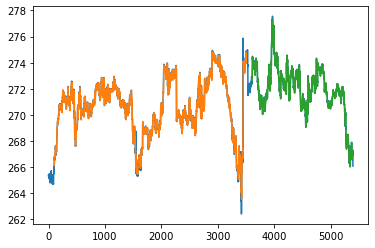

In [13]:
look_back=100
trainPredictPlot = numpy.empty_like(close_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(close_data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_data)-1, :] = test_predict

plt.plot(scaler.inverse_transform(close_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [14]:
l=len(test_data)
x_input=test_data[l-100:].reshape(1,-1)
print(x_input.shape)

(1, 100)


In [15]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
print(temp_input)

[0.37714663143989213, 0.3883751651254954, 0.4029062087186226, 0.3982826948480813, 0.3929986789960367, 0.3817701453104334, 0.3764861294583852, 0.3685601056803165, 0.37912813738441287, 0.3672391017173062, 0.38044914134742314, 0.3817701453104334, 0.3817701453104334, 0.399187582562746, 0.40025759577278563, 0.4009247027741054, 0.3883751651254954, 0.3685601056803165, 0.3665785997357993, 0.34280052840158604, 0.33421400264200685, 0.34280052840158604, 0.34478203434609966, 0.332892998678993, 0.3461030383091135, 0.32236459709378806, 0.34280052840158604, 0.34280052840158604, 0.3355350066050171, 0.30317040951122465, 0.3091149273447833, 0.256274768824305, 0.2734478203434598, 0.3077939233817659, 0.2780713342140011, 0.287978863936587, 0.2859973579920734, 0.2859973579920734, 0.2992073976221903, 0.31175693527080384, 0.33421400264200685, 0.3157199471598382, 0.3157199471598382, 0.3163804491413451, 0.3421334214002627, 0.34280052840158604, 0.2999339498018472, 0.256274768824305, 0.252972258916774, 0.25099075

In [16]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.29005367]
101
1 day input [0.38837517 0.40290621 0.39828269 0.39299868 0.38177015 0.37648613
 0.36856011 0.37912814 0.3672391  0.38044914 0.38177015 0.38177015
 0.39918758 0.4002576  0.4009247  0.38837517 0.36856011 0.3665786
 0.34280053 0.334214   0.34280053 0.34478203 0.332893   0.34610304
 0.3223646  0.34280053 0.34280053 0.33553501 0.30317041 0.30911493
 0.25627477 0.27344782 0.30779392 0.27807133 0.28797886 0.28599736
 0.28599736 0.2992074  0.31175694 0.334214   0.31571995 0.31571995
 0.31638045 0.34213342 0.34280053 0.29993395 0.25627477 0.25297226
 0.25099075 0.23778071 0.24966975 0.27476882 0.30250991 0.27476882
 0.27476882 0.27675033 0.29524439 0.28269485 0.27608983 0.28269485
 0.28269485 0.30250991 0.30779392 0.30779392 0.32166446 0.30911493
 0.33553501 0.32892999 0.30250991 0.30911493 0.30581242 0.33091149
 0.33883752 0.35535007 0.36129458 0.32232497 0.32232497 0.29458388
 0.29260238 0.29260238 0.29260238 0.27939234 0.27873184 0.27939234
 0.27807133 0.27278732 0.28467635 

In [17]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [18]:
import matplotlib.pyplot as plt

len(close_data)

5396

In [19]:
plt.plot(day_new,scaler.inverse_transform(close_data[6204:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [ ]:
data=close_data.tolist()
data.extend(lst_output)
plt.plot(data[6000:])

In [ ]:
data=scaler.inverse_transform(data).tolist()

In [ ]:
plt.plot(data)